#                                            Data Characteristics and Data Prepration Functions

                                           Saman Taheri, Pouria Ahmadi

## 1-Data Characteristics

The datasets contain operational building heating ventilation and air-conditioning
(HVAC) data, paired with validated ground-truth information as to the presence and absence of faults. Tis dataset spans a range of seasons and operational conditions and encompasses multiple building system types, fault
types, and fault severity, or intensity levels. Te systems of focus include air-handling units (AHUs). The included data points refect measurements that are typically logged in building control systems.
Te dataset comprises both simulated (i.e., modeled) data, and experimental (i.e., physical) data from test facilities. Te data were provided by multiple contributors, and synthesized into a single repository with a common
format and documentation

Let us begin by loading the dataset using "panda" package.  

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("MZVAV-1.csv") # "MZVAVA-1.csv" is the pathway to the dataset file.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272160 entries, 0 to 272159
Data columns (total 18 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   Datetime                                        272160 non-null  object 
 1   AHU: Supply Air Temperature                     272160 non-null  float64
 2   AHU: Supply Air Temperature Set Point           272160 non-null  float64
 3   AHU: Outdoor Air Temperature                    272160 non-null  float64
 4   AHU: Mixed Air Temperature                      272160 non-null  float64
 5   AHU: Return Air Temperature                     272160 non-null  float64
 6   AHU: Supply Air Fan Status                      272160 non-null  int64  
 7   AHU: Return Air Fan Status                      272160 non-null  int64  
 8   AHU: Supply Air Fan Speed Control Signal        272160 non-null  float64
 9   AHU: Return Air Fan Speed 

As can be seen, all the features have numeric values. This make the preprocessing easier as working with other data types is not straightforward. However, there is a challenges yet to be addressed: mapping the feature of hour to a to a set of data that represents time-related variables which include (I) hours of the day (from 1 to 24), (II) days of a year, (III) the day in a given month and the month number and (IV) years in the time horizon of the project. We will take care of this two challenges in the following sections.

To get a better feeling of the dataset, we can see some statistical aspects of the dataset ( for only numerical features) by writing:

In [25]:
df


,Datetime,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
0,1/30/2017 0:00,68.00,55.04,32.00,68.00,75.20,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
1,1/30/2017 0:01,67.99,55.04,32.00,66.71,75.20,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
2,1/30/2017 0:02,67.99,55.04,-5.93,66.71,74.45,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
3,1/30/2017 0:03,67.99,55.04,-5.88,66.71,74.04,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
4,1/30/2017 0:04,67.99,55.04,-5.83,66.71,73.56,0,0,0.0,0.0,0.0,0.0,0.00,0,0.04,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272155,12/17/2017 23:55,55.04,55.04,17.89,62.52,62.53,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,1
272156,12/17/2017 23:56,55.04,55.04,17.87,62.52,62.53,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,1
272157,12/17/2017 23:57,55.04,55.04,17.85,62.52,62.53,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,1
272158,12/17/2017 23:58,55.04,55.04,17.83,62.52,62.52,1,1,1.0,1.0,0.0,0.0,0.01,0,0.04,0.11,0,1


In [26]:
df.describe()

,AHU: Supply Air Temperature,AHU: Supply Air Temperature Set Point,AHU: Outdoor Air Temperature,AHU: Mixed Air Temperature,AHU: Return Air Temperature,AHU: Supply Air Fan Status,AHU: Return Air Fan Status,AHU: Supply Air Fan Speed Control Signal,AHU: Return Air Fan Speed Control Signal,AHU: Outdoor Air Damper Control Signal,AHU: Return Air Damper Control Signal,AHU: Cooling Coil Valve Control Signal,AHU: Heating Coil Valve Control Signal,AHU: Supply Air Duct Static Pressure Set Point,AHU: Supply Air Duct Static Pressure,Occupancy Mode Indicator,Fault Detection Ground Truth
count,272160.000000,2.721600e+05,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,272160.000000,2.721600e+05,272160.000000,272160.000000,272160.000000
mean,53.762030,5.504000e+01,48.357590,65.000186,71.453754,0.670242,0.670242,0.480342,0.480342,0.213219,0.000009,0.043273,0.000077,4.000000e-02,0.034261,0.487654,0.857143
std,2.545891,2.842176e-14,20.154449,7.409942,3.702466,0.470126,0.470126,0.353275,0.353275,0.325107,0.004696,0.083905,0.008784,1.387781e-17,0.032849,0.499848,0.349928
min,44.950000,5.504000e+01,-14.260000,22.610000,54.470000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e-02,-0.020000,0.000000,0.000000
25%,52.000000,5.504000e+01,36.320000,57.030000,70.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,4.000000e-02,0.000000,0.000000,1.000000
50%,54.070000,5.504000e+01,52.340000,65.570000,72.010000,1.000000,1.000000,0.640000,0.640000,0.000000,0.000000,0.020000,0.000000,4.000000e-02,0.040000,0.000000,1.000000
75%,55.040000,5.504000e+01,62.610000,72.020000,74.260000,1.000000,1.000000,0.670000,0.670000,0.240000,0.000000,0.040000,0.000000,4.000000e-02,0.040000,1.000000,1.000000
max,72.030000,5.504000e+01,90.140000,78.720000,87.870000,1.000000,1.000000,1.000000,1.000000,1.000000,2.450000,0.600000,1.000000,4.000000e-02,0.120000,1.000000,1.000000


We can also plot histograms to gain insight as well as detect outliers.

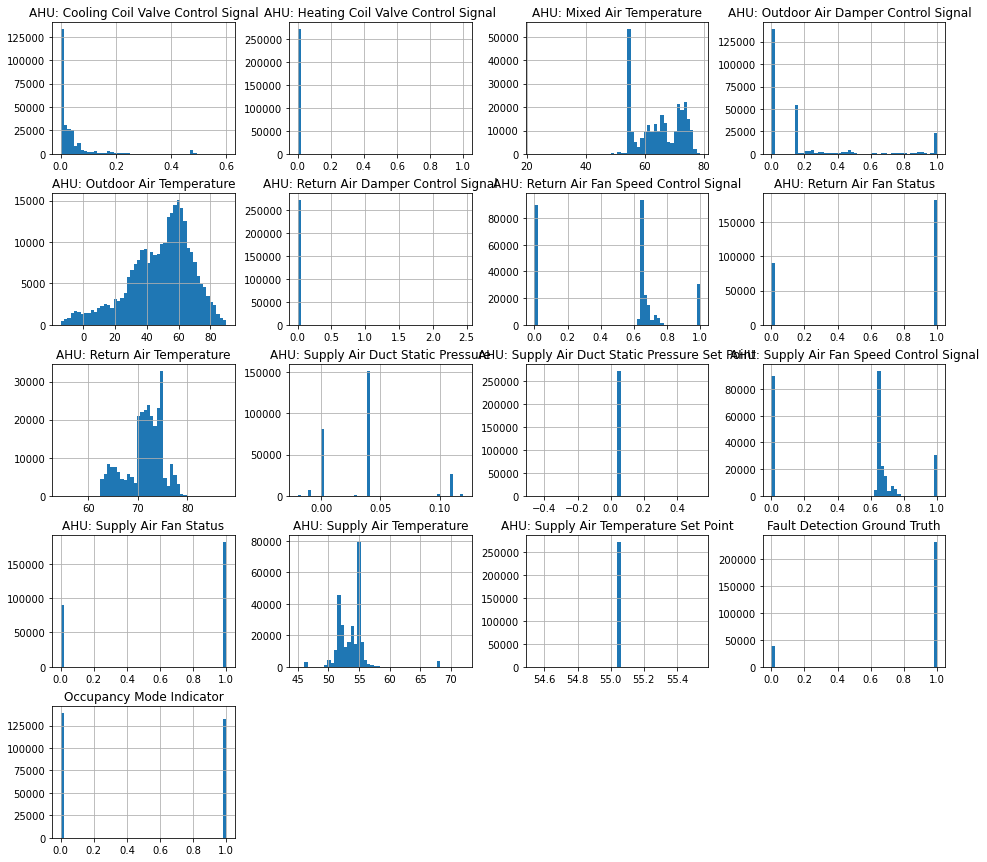

In [27]:
# to get the histogram we can write:
%matplotlib inline
from matplotlib import pyplot as plt

df.hist(bins=50, figsize=(16,15)) #x[0].hist(bins=50, figsize=(20,15)) this gives yoy individual histograms
plt.show()

Based on the histogram figures, several actions can be implemented to improve the dataset. for example, the "AHU: Return Air Temperature" feature is of a discrete nature. Now, looking at its histogram, you can find that the number of instances for categories of AHU: Return Air Temperature>= 80 are relatively scarce. Therefore, one can combine all these categories into one. That will help the model to better analyze this feature. The following code is dedicated to this.

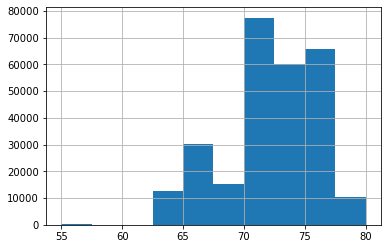

In [32]:

# remember that each category should have lots of instances, thus we should combine all samples of 5,6,...,12 to category 5
# we canuse the predeterminde Python code:
df["AHU: Return Air Temperature"] = np.ceil(df["AHU: Return Air Temperature"])
df["AHU: Return Air Temperature"].where(df["AHU: Return Air Temperature"]< 80,80, inplace=True)
df["AHU: Return Air Temperature"].hist()

Moreover, drawing some plots based on the features can be really useful. Consider the following chart as an example. 

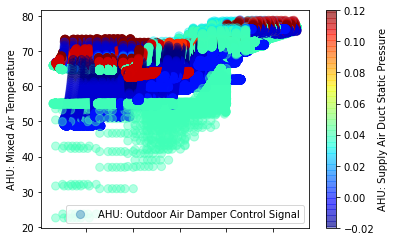

In [39]:
from scipy import stats
from scipy.stats import norm
# lets create a copy from traing set to go in depth even more
our_data_insight = df.copy()
# we can plot the data based on geographical features to obtain a sense
#X1 = our_data_insight[""]
#X2 =  our_data_insight["Supply Air Temperature"]

#plt.scatter(X1, X2, alpha=0.1) # setting alpha to 0.1 makes visualisation easier (bluish dots are more frequent)

# now consider we want to engage the population size showing it by the dots radius, and also housing prices
#by different color
our_data_insight.plot(kind="scatter", x="AHU: Outdoor Air Temperature", y="AHU: Mixed Air Temperature", alpha=0.4,
             s=our_data_insight["AHU: Return Air Temperature"], label="AHU: Outdoor Air Damper Control Signal",
             c="AHU: Supply Air Duct Static Pressure", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()

we can also compute the correlation between attributes as easy as pie:

AHU: Supply Air Temperature                       1.513624e-02
AHU: Supply Air Temperature Set Point             4.438036e-13
AHU: Outdoor Air Temperature                      4.465621e-09
AHU: Mixed Air Temperature                        2.174648e-03
AHU: Return Air Temperature                       2.827476e-03
AHU: Supply Air Fan Status                       -2.010143e-04
AHU: Return Air Fan Status                       -2.010143e-04
AHU: Supply Air Fan Speed Control Signal          1.651300e-04
AHU: Return Air Fan Speed Control Signal          1.651300e-04
AHU: Outdoor Air Damper Control Signal            2.153372e-03
AHU: Return Air Damper Control Signal             7.825517e-04
AHU: Cooling Coil Valve Control Signal           -1.170547e-02
AHU: Heating Coil Valve Control Signal           -1.815715e-15
AHU: Supply Air Duct Static Pressure Set Point   -4.634156e-13
AHU: Supply Air Duct Static Pressure             -1.776334e-04
Occupancy Mode Indicator                          1.153

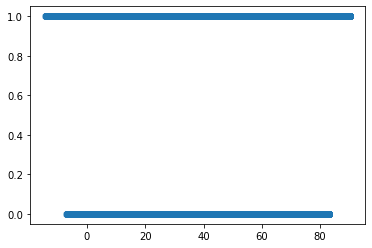

In [40]:
# we can also compute the correlation between attributes as easy as pie:
correlation_matrix = our_data_insight.corr()
#insight let’s look at how much each attribute correlates with the median house value:
#print(correlation_matrix.iloc[8].sort_values(ascending = False))
print(correlation_matrix.loc["Fault Detection Ground Truth"])
#Another way to check for correlation between attributes is to use Pandas’ scatter_matrix function
# from pandas.plotting import scatter_matrix
# attributes = ["median_house_value", "median_income", "total_rooms"] 
# scatter_matrix(our_data_insight[attributes], figsize=(12, 8))

# we see that our target is most correlated with income attribute, so it is useful to plot them
plt.scatter(our_data_insight["AHU: Outdoor Air Temperature"], our_data_insight["Fault Detection Ground Truth"], alpha=0.1)

# 1: the correlation is realy strong
# 2: we have a prive cap of 500000 in our data
# 3: another messy data: a line around 370000 and a line around 230000, shall we remove them?

Just by some simple calculations, we now have a more understanding of the dataset, a very crucial step in any machine learning project. Now  we have to preprocess the data.

## 2-Data Preprocessing

A dataset gathered for real-world applications is vulnerable to several errors/discrepancies, which might lead to poor data analysis. These discrepancies can compromise noise, incomplete data, missing values, etc. To ensure that we can gain a high-resolution knowledge from the datasets, preprocessing should be incorporated. Generally, the preprocessing phase includes several stages that can be summarized as follows:

####         Firstly, we should fill missing values, remove noises, detect outliers, and resolve discrepancies within the     dataset. This step is called data cleaning.

####            Second, we must make sure that the data is in a usable format. This is done by feature scaling and integration of multiple files into one master file containing all data. This stage is named data transformation.

####            Next, we have to check for the most and least important features that are correlated with the load prediction. By doing so, one can get an insight into the target, delete less correlated attributes, and create highly correlated new features.

####            Finally, it is better to make a pipeline that does all the steps sequentially. A pipe will significantly help to organize all the processes, as well as make useable for other researchers. 

Here, a full pipeline is developed using "Panda" and "Scikit" in Python, exclusively for FDD task. All the four steps are coded in a way that one with a basic knowledge of Python can implement the full pipeline straightforwardly.

In [3]:
# 1) We are going to find the most important attribute and split the data:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

class SplitDataByImportantAttribute(BaseEstimator,TransformerMixin):
    def fit(self, dataframe, y=None):
        return(self)
    def transform(self, dataframe, y=None):
        import sklearn
        from sklearn.model_selection import StratifiedShuffleSplit
        import sys
        import numpy as np
        import pandas as pd
        %matplotlib inline
        from matplotlib import pyplot as plt
        List1 = list(dataframe)
        print("Here is the name of all columns: ")
        print (List1)
        target_index = input("Please write the name of the target column: ")
        Correlation_matrix = dataframe.corr().loc[target_index].sort_values(ascending = False)
        most_importatnt_attribute = Correlation_matrix.index[1]
        print(" The most important attribute is {" + most_importatnt_attribute + "}  correlated by a factor of " + str(Correlation_matrix[1]))
        print(dataframe[most_importatnt_attribute].hist(), plt.xlabel(most_importatnt_attribute), plt.ylabel("frequency"),  plt.title('Histogram of ' + most_importatnt_attribute))
        devise_metric= dataframe[most_importatnt_attribute].mean() / dataframe[most_importatnt_attribute].std()
        category_count1 = np.int(dataframe[most_importatnt_attribute].mean() + 1 *dataframe[most_importatnt_attribute].std())
        category_count2 = np.int(dataframe[most_importatnt_attribute].mean() - 1 *dataframe[most_importatnt_attribute].std())
        dataframe[most_importatnt_attribute + "_cat"]= np.ceil(dataframe[most_importatnt_attribute]/devise_metric)
        dataframe[most_importatnt_attribute + "_cat"].where(dataframe[most_importatnt_attribute + "_cat"]< category_count1, category_count1, inplace=True)
        dataframe[most_importatnt_attribute + "_cat"].where(dataframe[most_importatnt_attribute + "_cat"]> category_count2, category_count2, inplace=True)
        print(dataframe[most_importatnt_attribute + "_cat"].hist(), plt.xlabel(most_importatnt_attribute), plt.ylabel("frequency"),  plt.title('Histogram of most importatnt attribute' ))
        split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) # it defines split characteristic
        x = split.split(dataframe, dataframe[most_importatnt_attribute + "_cat"]) #it splits the attribute and gives indices for test an training 
        for train_index, test_index in x:
            strat_train_set = dataframe.loc[train_index]
            strat_test_set = dataframe.loc[test_index]
        strat_train_set = strat_train_set.drop(columns = most_importatnt_attribute + "_cat")
        strat_test_set = strat_test_set.drop(columns = most_importatnt_attribute + "_cat")
        return(strat_train_set)  

# after this implementation you put the strat_test_set aside completely.

In [4]:
#2) try to find better attributes with feature engineering insight. It is very case dependent. yet the most usefule key is:
#   attributes with near zero correlation to the target, are better be replaced or changed.
class AttributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self, test_number):
        self.test_number = test_number
    def fit(self, strat_train_set, y=None):
        return(self)
    def transform(self, strat_train_set, y=None):
        import numpy as np
        import pandas as pd
        list1 = list(strat_train_set)
        print("Here is the name of all columns: ")
        print (list1)
        target_index = input("Please write the name of the target column: ")
        correlation_matrix = strat_train_set.corr().loc[target_index]
        list2=[]
        for i in range(len(correlation_matrix)):
            if correlation_matrix[i] <0.15 and correlation_matrix[i]>-0.15:
                list2.append(correlation_matrix.index[i])        
        for i in range(self.test_number):
            index1 = np.random.randint(len(list2))
            index2 = np.random.randint(len(list2))
            x = list2[index1]
            y = list2[index2]
            z = x+ "_per_"+ y
            test_attributes =  pd.DataFrame()
            test_attributes[target_index] = strat_train_set[target_index]
            test_attributes[z] = strat_train_set[x] /strat_train_set[y]
            correlation_with_target = test_attributes.corr().loc[z][target_index]
            if correlation_with_target >0.15 or correlation_with_target <-0.15:
                print(z + " have a pretty high correlation "+ str(correlation_with_target) +" with target")
                strat_train_set[z] = test_attributes[z]
            else:
                print(z + "is not much suitable")

        return(strat_train_set)   

# now you can decide what of this attributes  can be added to the training set.

In [5]:
# Data cleaning: a) fill null data with "median or ..." using imputers and transforms,
class filling_NaN(BaseEstimator,TransformerMixin):
    def __init__(self, strategy):
        self.strategy =  strategy
    def fit(self, strat_train_test, y=None):
        return(self)
    def transform(self, strat_train_set, y=None):
        from sklearn.impute import SimpleImputer
        from sklearn.preprocessing import LabelBinarizer
        from sklearn.preprocessing import StandardScaler
        imputer = SimpleImputer(strategy = self.strategy)
        labeler = LabelBinarizer()
        scaler =  StandardScaler()
        target_index = input("Please write the name of the target column: ")
        X_strat_train_set= strat_train_set.drop(columns = [target_index])
        Y_train = strat_train_set[target_index]    
        list1 = X_strat_train_set.dtypes
        list2=[]
        list3= []
        for i in range(len(list1)):
            if list1[i] != object:
                list2.append(list1.index[i])
            else:
                list3.append(list1.index[i])        
        numerical_attributes = X_strat_train_set[list2]
        x = pd.DataFrame(imputer.fit_transform(numerical_attributes), columns = list2)
        for item in list3:
            y= labeler.fit_transform(X_strat_train_set[item])
            counter = 0
            for j in range(len(y[0])):
                z= []
                for i in range(len(y)):
                    z.append(y[i][j])            
                counter += 1
                x[item + str(counter)]= z 

        X_train_fully_prepared =  scaler.fit_transform(x)
        return(X_train_fully_prepared, Y_train)

In [ ]:
full_prepration = Pipeline([
    ("spliter", SplitDataByImportantAttribute()),
    ("featurer", AttributeAdder(3)), # increase the number (10) to check more attributes
    ("filler", filling_NaN("median")),
])
X_train, Y_train =  full_prepration.fit_transform(df)

Here is the name of all columns: 
['Datetime', 'AHU: Supply Air Temperature', 'AHU: Supply Air Temperature Set Point', 'AHU: Outdoor Air Temperature', 'AHU: Mixed Air Temperature', 'AHU: Return Air Temperature', 'AHU: Supply Air Fan Status', 'AHU: Return Air Fan Status', 'AHU: Supply Air Fan Speed Control Signal', 'AHU: Return Air Fan Speed Control Signal', 'AHU: Outdoor Air Damper Control Signal  ', 'AHU: Return Air Damper Control Signal', 'AHU: Cooling Coil Valve Control Signal', 'AHU: Heating Coil Valve Control Signal', 'AHU: Supply Air Duct Static Pressure Set Point', 'AHU: Supply Air Duct Static Pressure', 'Occupancy Mode Indicator', 'Fault Detection Ground Truth', 'AHU: Supply Air Temperature_cat']
Please write the name of the target column: Fault Detection Ground Truth
 The most important attribute is {AHU: Supply Air Temperature}  correlated by a factor of 0.015136242138349623
AxesSubplot(0.125,0.125;0.775x0.755) Text(0.5, 0, 'AHU: Supply Air Temperature') Text(0, 0.5, 'frequen

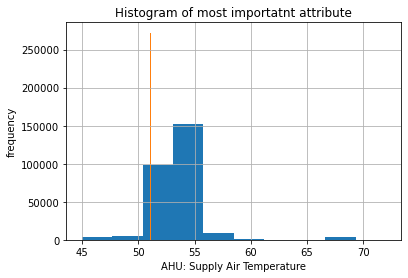